## Calibration Example

This file gives some pointers for how to read in an image file and draw lines in pixel coordinates.  You will need to add your own code to finish the calibration of the microscope length scale.  The goal is to calibrate the microscope length scale, in other words find how many microns per pixel are shown in the recorded images.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Read in calibration image and draw it

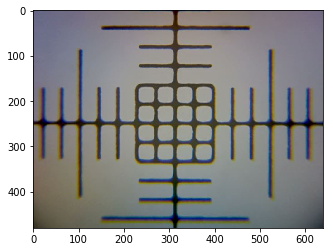

In [2]:
img = mpimg.imread("data/calibration_x100.jpg")
plt.imshow(img);

This is in color, with three values per pixel. Note that the total size is 640x480 (which matches the resolution of the original image.  Lets try turning this into greyscale to improve the contrast.

In [3]:
def as_grey(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

greyimg = as_grey(img)

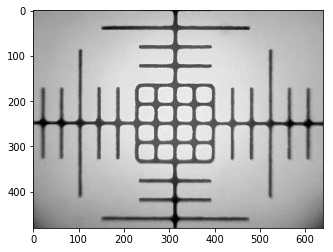

In [4]:
plt.imshow(greyimg, cmap='gray');

Now we can draw lines at particular coordinates to match the features on the image.  Knowing that each line on the target is 10 um apart, this allows us to calibrate our image microns/pixel.

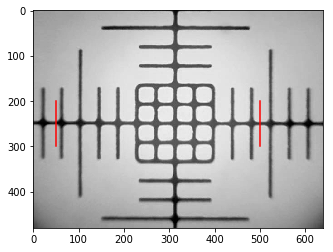

In [5]:
plt.imshow(greyimg, cmap='gray')

# These values are the x positions of the lines (in pixels)
# Adjust these to match lines on the calibration target
x1 =  50
x2 = 500
yrange = [200,300] # Control the vertical size of the lines
plt.plot([x1,x1],yrange,'r');
plt.plot([x2,x2],yrange,'r');

We can also do this in the y direction.  Camera pixels are not guaranteed to be perfectly square, so you may get a different result in the x and y direction.